# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.29 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


Downloading the unity enviroment

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

In [4]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

from dqn_agent import Agent
agent = Agent(state_size, action_size, 0)

In [5]:
N_EPISODES = 600
MAX_T = 1000
EPSILON = 1
EPSILON_DECAY = 0.99
MIN_EPSILON = 0.05

In [6]:
scores = []
scores_window = deque(maxlen=100)

for i_episode in range(1, N_EPISODES):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations[0]  
    score = 0
    for t in range(MAX_T):
        action = agent.act(state, EPSILON)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0] 
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break
    scores.append(score)
    scores_window.append(score)
    if EPSILON > MIN_EPSILON:
        EPSILON *= EPSILON_DECAY
    

    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window)>=13:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        break
        

Episode 100	Average Score: 2.69
Episode 200	Average Score: 7.60
Episode 300	Average Score: 11.15

Environment solved in 293 episodes!	Average Score: 13.05


# Graph of rewards per episode

Text(0,0.5,'Score')

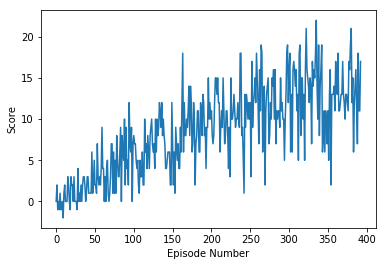

In [7]:
plt.plot(np.arange(len(scores)), scores)
plt.xlabel('Episode Number')
plt.ylabel('Score')

## Summary

The algorithm makes use of a DQN netwrok, similar to the one which was used by OpenAI to surpass human level in Atari games. The algorithm works as follows:

- Given state s(t) by the enviroment, the algorithm takes action a(t) based on an epsilon greedy policy. It then receives reward r(t+1) and state(s+1). Its stores this experience in memory and sets s = s(t+1).

- Every UPDATE_EVERY steps, the algorithm samples a batch of 32 expereince tuples from its memory and learns from them. This is done in order to break correlations between consecutive actions and reduce the chance of divergence. 

- Once the batch has been sampled, it learns from these experience by estimating the value of an action by the r(t) plus the value of the greedy action taken on s(t+1). It then constructs a loss function by comparing the new estimated action value and the estimated action value of a previous version of the network. Using a previous version of the network breaks correlations, so the agent is not chasing a moving target.

- The loss is then used to improve to update the weights through backpropagation. The enviroment is considered solved once the function produces action that result in an avergae return of 13 over 100 episodes. 



## Hyperparamters

N_EPISODES = 600;   
MAX_T = 1000;   
EPSILON = 1;   
EPSILON_DECAY = 0.99;   
MIN_EPSILON = 0.05;   
BUFFER_SIZE = int(1e5);   
BATCH_SIZE = 64;            
GAMMA = 0.99;       
TAU = 1e-3;              
LR = 5e-4;                  
UPDATE_EVERY = 4; 

Archticture:
Dense 1: 64 units, relu activation   
Dense 2: 64 units, relu activation   
Dense 3: action_size(4) units, linear activation

## Future Improvement

The other 4 ideas which make up the rainbow algorithm can be implemeted. Also, further hyperparamter tuning can be done to improve performance. A smaller neural would reduce training time and may be good enough for the task at hand. Lastly, I think if rewards were made to be comparable with other games, than transfer learning in the convulution layers could help.